<a href="https://colab.research.google.com/github/RaqeebShaikh12/Car-Price-Prediction-using-Multiple-Linear-Regression/blob/main/Car_Price_Prediction_using_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression
## Car Price Prediction

In [92]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the data

Now let us import the libraries and read the `car price` dataset.

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
from google.colab import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [95]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))


In [96]:
# Check the head of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [97]:
df.shape

(205, 26)

Dataset contain `205 rows` and `26 columns`.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

We use `info()` method to get the data types of columns. In this 8 int, 8 float & 10 object data types are used. We can see that there are no `null values` in this dataset.

In [99]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We have use `describe()` method to visualise the statistical parameter like count, mean, standard deviation, minimun, maximum, inter quantile value of the columns. By looking at its statistical parameter we cannot determine anything as it all looks fine so we have to check it through some other way.

## Cleaning the Data

Drop the columns which are not usefull in building the model.

Splitting `CompanyName` from `CarName` column.

In [100]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)

In [101]:
df.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


`Fixing Invalid Values` : There seems to be some spelling error in the CompanyName column.<br>
1.  maxda=mazda
2.  Nissan=nissan
3.  porsche=porcshce
4.  toyouta=toyota
5.  vokswagen=volkswagen=vw

In [102]:
df['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [103]:
df["CompanyName"] = df["CompanyName"].str.lower()

def replace_name(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [104]:
df3=df.drop(['car_ID','CarName','doornumber'],axis=1)
df3.head()

,symboling,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Visualising the Data

Let's visualise the data with the help of `matplotlib` & `seaborn` library.

#### Visualising Numeric Variable

Let's make a `pairplot` for all the numeric variables.

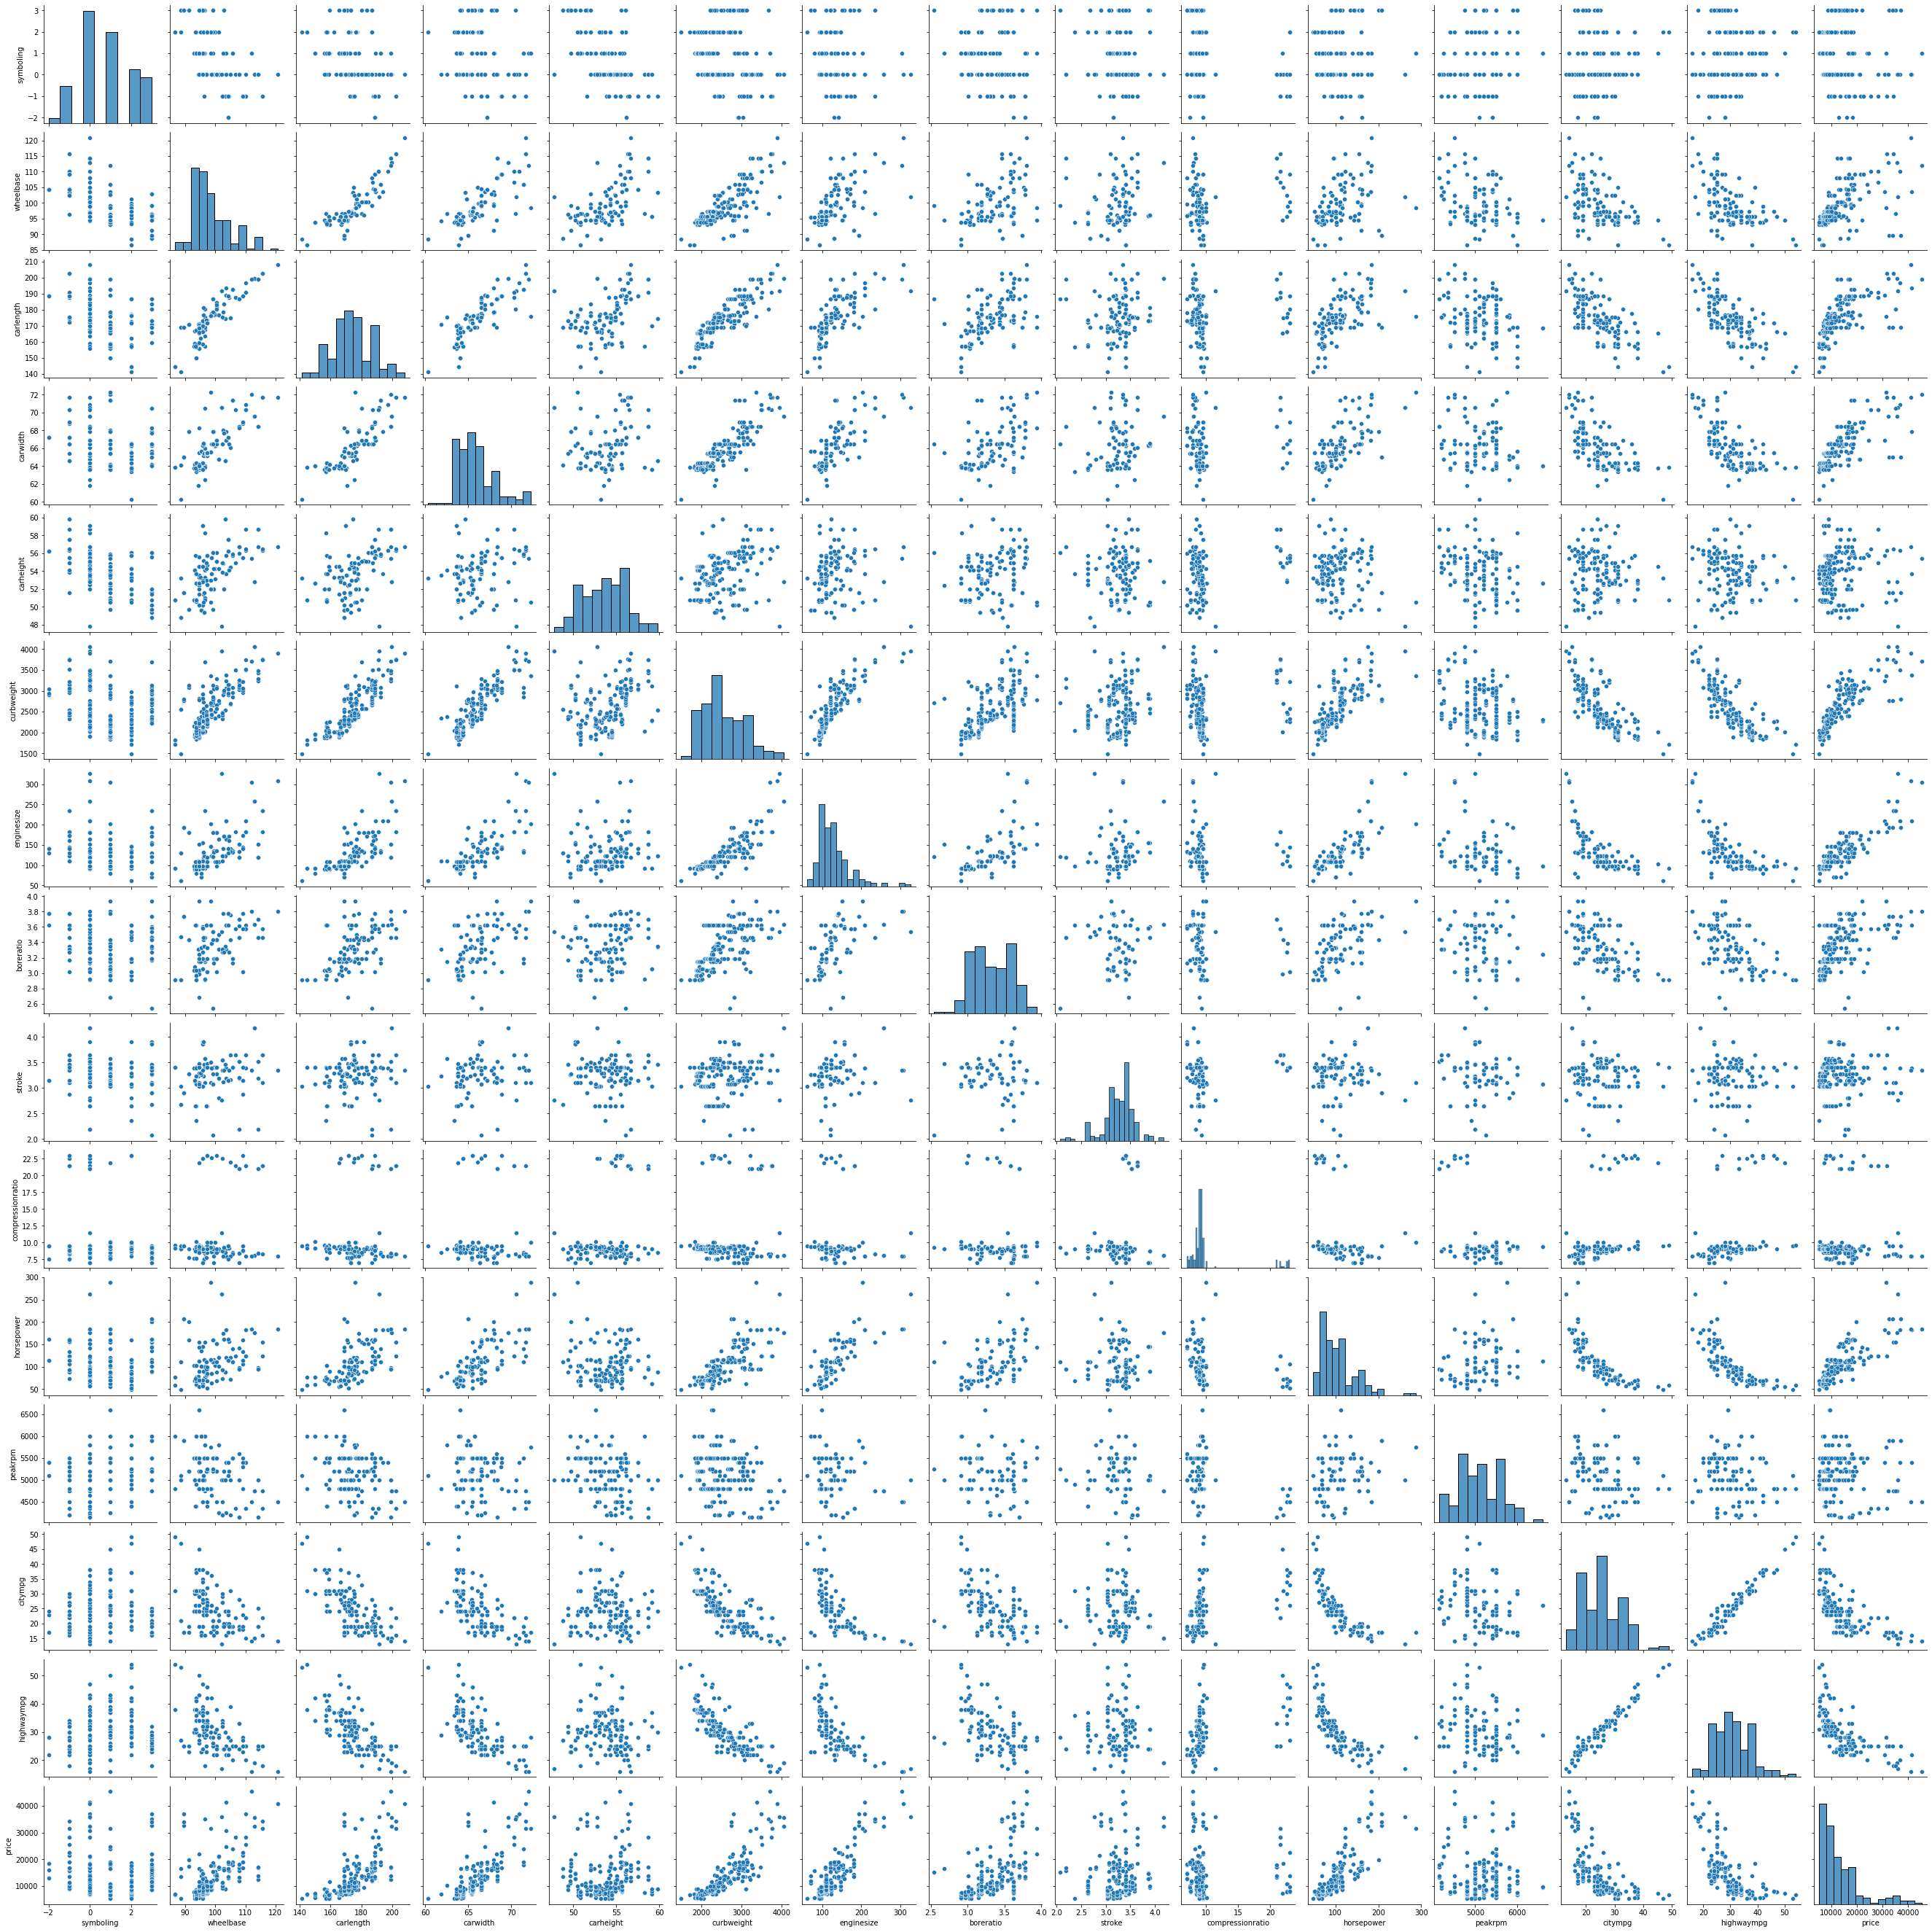

In [105]:
sns.pairplot(df3)
plt.show()

As we can see our target variable is having some correlation with predictor variables which means we can build our model using multiple linear regression.

#### Visualising Categorical Variable

Let's Visualise by making `boxplot` for these categorical variables.

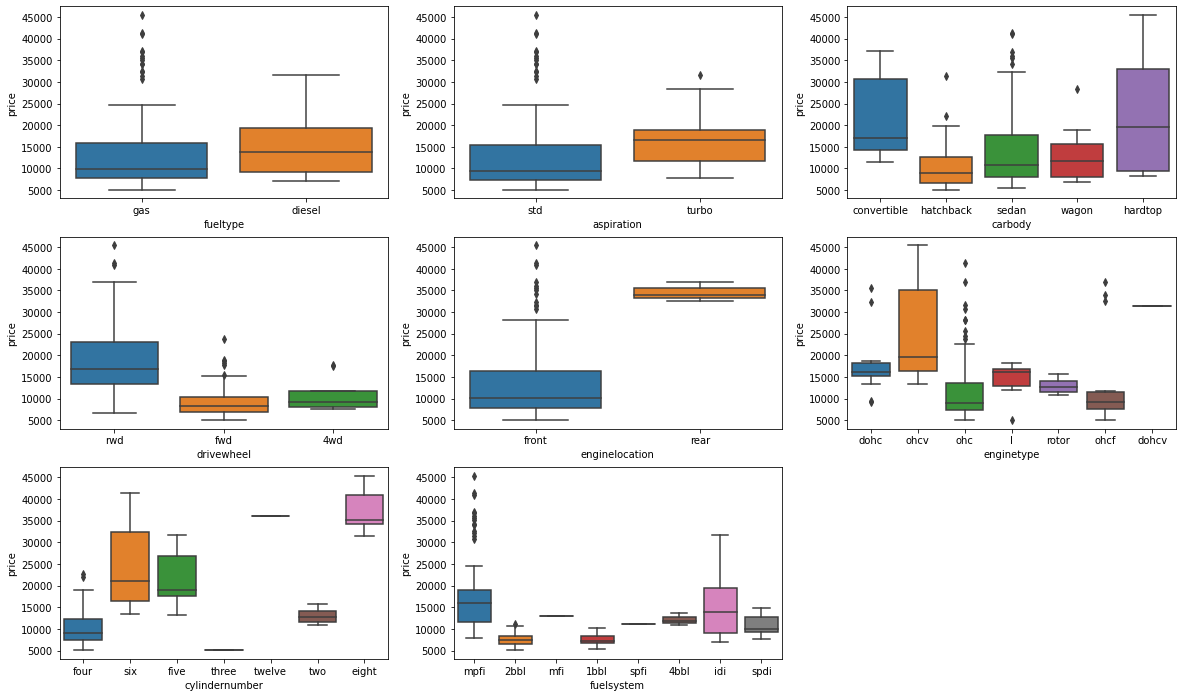

In [106]:
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df3)

plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df3)

plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = df3)

plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df3)

plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df3)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = df3)

plt.subplot(3,3,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df3)

plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df3)

plt.show()

We can see the variation of price with different factors in the boxplot but to make sure on which it depend the most and the least we have to build the model.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `driverwheel` with `enginelocation` as the hue.

## Data Preparation

As we can see our columns have string value but in order to fit a regression line, we would need numerical values. Hence, we need to convert them. For this, we will use something called `dummy variables`.

In [107]:
df3 = pd.get_dummies(df3, columns=['fueltype','aspiration','carbody','drivewheel','enginelocation','fuelsystem','cylindernumber','enginetype'],drop_first=True)

In [108]:
df3.head()

,symboling,CompanyName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,0,1,0
3,2,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0
4,2,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0


Now we have to deal with column `CompanyName` we will do encoding in this to convert into integer.

In [109]:
car_name_dummies=pd.get_dummies(df3['CompanyName'])
df3=pd.concat([df3,car_name_dummies],axis=1)
df3.head()

,symboling,CompanyName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,2,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


Dropping the column whose dummies are created.

In [111]:
df3=df3.drop(['CompanyName'],axis=1)
df3.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


Now our data set is ready we should split it into train and test set.

## Splitting the Data into Training and Testing Sets

In [112]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df3, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

We will use `Min-Max Scaling` method.

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [114]:
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [115]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [116]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


Now Let's see the correlation coefficient to check which variable is highly correlated.

In [117]:
df_train.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
symboling,1.000000,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,-0.182393,-0.132768,-0.028788,-0.266962,...,0.056056,-0.162832,0.028865,0.188676,0.020266,0.188676,-0.105017,-0.100556,0.120186,-0.374108
wheelbase,-0.539877,1.000000,0.877909,0.796888,0.555524,0.792815,0.588600,0.482386,0.224970,0.341651,...,-0.157336,0.481538,-0.137718,-0.108163,-0.048575,0.014215,-0.101395,-0.004621,-0.026522,0.288038
carlength,-0.390880,0.877909,1.000000,0.846307,0.454721,0.881495,0.702794,0.620436,0.176814,0.227958,...,-0.077103,0.346285,-0.150217,-0.026237,0.054390,0.153722,-0.080658,-0.040208,-0.005208,0.256437
carwidth,-0.263917,0.796888,0.846307,1.000000,0.245022,0.873884,0.754925,0.580962,0.233631,0.249516,...,-0.144592,0.281075,-0.156830,0.178696,0.038331,0.043796,-0.102745,-0.136127,-0.014381,0.209624
carheight,-0.557179,0.555524,0.454721,0.245022,1.000000,0.272388,0.045042,0.160835,0.003588,0.289830,...,0.016257,0.357408,-0.195973,-0.168105,-0.034461,0.153810,0.002497,0.101964,0.118105,0.217012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saab,0.188676,0.014215,0.153722,0.043796,0.153810,0.057941,-0.014190,0.130910,-0.084639,-0.032874,...,-0.048224,-0.035635,-0.024832,-0.021429,-0.017434,1.000000,-0.042258,-0.059028,-0.033211,-0.030635
subaru,-0.105017,-0.101395,-0.080658,-0.102745,0.002497,-0.115061,-0.126965,0.346952,-0.589080,-0.093537,...,-0.095100,-0.070273,-0.048970,-0.042258,-0.034381,-0.042258,1.000000,-0.116405,-0.065492,-0.060412
toyota,-0.100556,-0.004621,-0.040208,-0.136127,0.101964,-0.041279,-0.055878,-0.117697,-0.018217,-0.034398,...,-0.132841,-0.098161,-0.068405,-0.059028,-0.048025,-0.059028,-0.116405,1.000000,-0.091483,-0.084387
volkswagen,0.120186,-0.026522,-0.005208,-0.014381,0.118105,-0.064348,-0.076763,-0.124850,0.109220,0.043983,...,-0.074739,-0.055228,-0.038486,-0.033211,-0.027020,-0.033211,-0.065492,-0.091483,1.000000,-0.047478


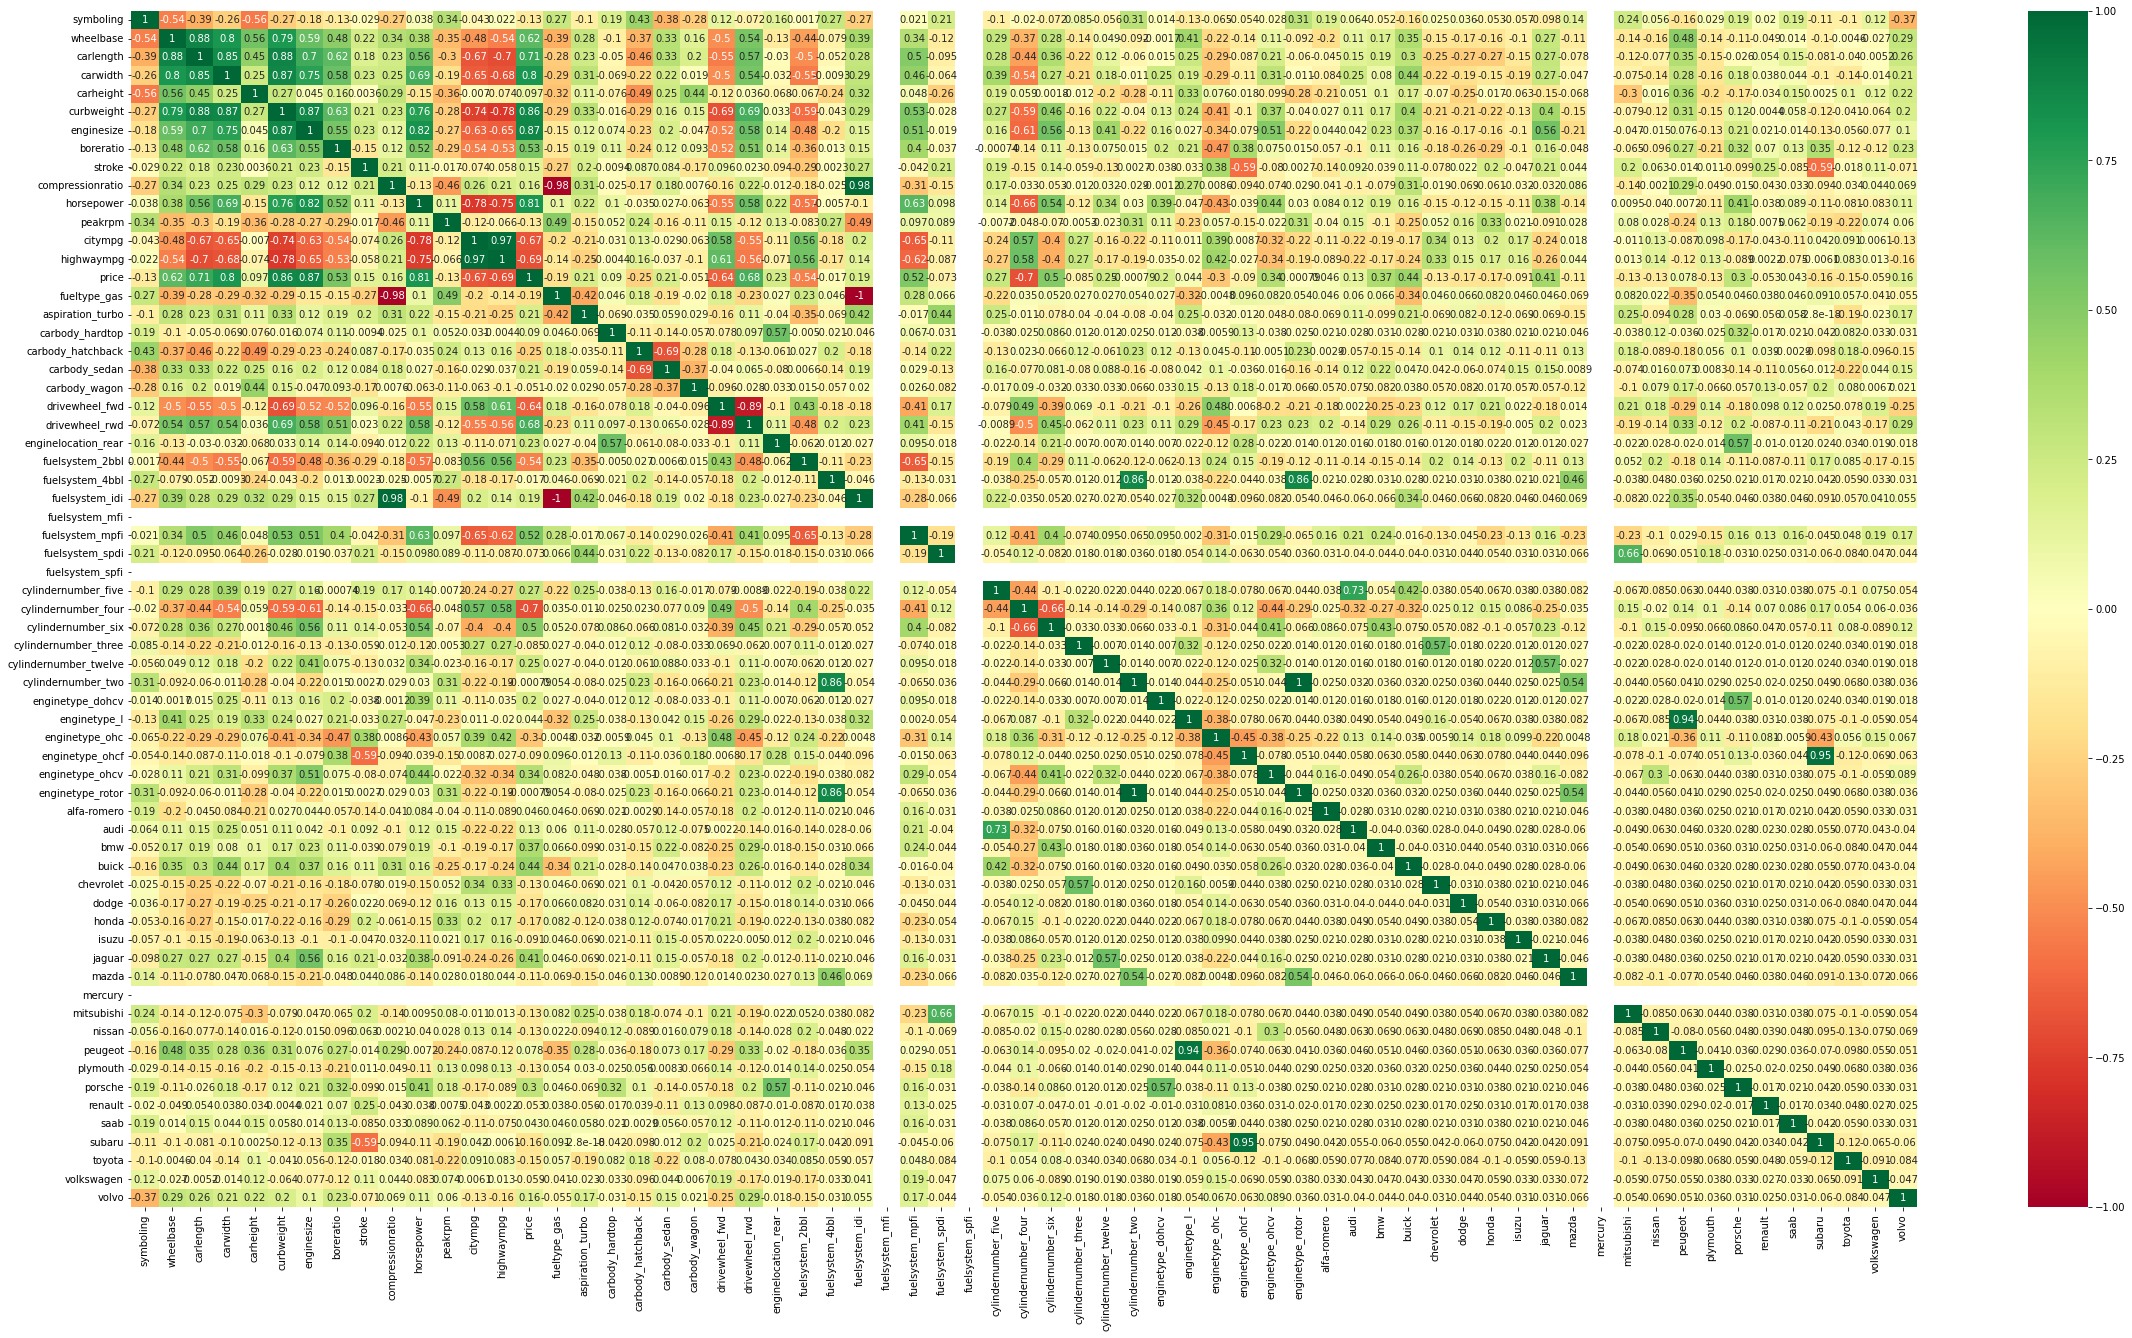

In [118]:
plt.figure(figsize = (40, 22))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

As you might have noticed there are few columns that are correlated to `price`. Let's move to our next step for building a model.

#### Dividing into X and Y sets for the model building

In [119]:
y_train = df_train.pop('price')
X_train = df_train

## Building a Linear Model

We will be adding all the variables to the model

In [120]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        -0.142782
symboling    -0.003785
wheelbase     0.233712
carlength    -0.174231
carwidth      0.272383
                ...   
saab          0.207049
subaru       -0.048454
toyota        0.000229
volkswagen    0.005283
volvo         0.088902
Length: 65, dtype: float64

These are the coefficient of all the column

In [121]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     58.81
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.56e-50
Time:                        14:45:43   Log-Likelihood:                 279.43
No. Observations:                 143   AIC:                            -444.9
Df Residuals:                      86   BIC:                            -276.0
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

Looking at the `p-values`, it looks like some of the variables aren't really significant (in the presence of other variables).
We could simply drop the variable with the highest, non-significant `p-value`. But dropping 1 variable and then checking again and again takes lots of time so to overcome this we can use `Recursive Feature Elimination`.

#### Recursive Feature Elimination (RFE)

In [122]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

We will check for the `10` predictor variable.

In [129]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [130]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 51),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 26),
 ('fueltype_gas', False, 24),
 ('aspiration_turbo', False, 14),
 ('carbody_hardtop', False, 31),
 ('carbody_hatchback', False, 30),
 ('carbody_sedan', False, 32),
 ('carbody_wagon', False, 33),
 ('drivewheel_fwd', False, 48),
 ('drivewheel_rwd', False, 42),
 ('enginelocation_rear', True, 1),
 ('fuelsystem_2bbl', False, 47),
 ('fuelsystem_4bbl', False, 34),
 ('fuelsystem_idi', False, 29),
 ('fuelsystem_mfi', False, 53),
 ('fuelsystem_mpfi', False, 36),
 ('fuelsystem_spdi', False, 35),
 ('fuelsystem_spfi', False, 54),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 28)

In [131]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginelocation_rear', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'bmw', 'porsche'],
      dtype='object')

These are the columns which we can use to build our model.

#### Building Model For the Required Columns Using StatsModel

In [132]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [133]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [134]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [135]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.21e-64
Time:                        14:49:41   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

Drop the `const` before checking the `VIF`.

In [158]:
X_train_z = X_train_rfe.drop(['const'], axis=1)

#### Checking VIF

In [159]:
vif = pd.DataFrame()
X = X_train_z
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,41.06
0,carwidth,25.19
2,enginesize,24.95
3,boreratio,9.78
9,porsche,1.67
4,enginelocation_rear,1.61
6,cylindernumber_twelve,1.50
7,cylindernumber_two,1.27
8,bmw,1.18
5,cylindernumber_three,1.01


As we can see `p-value` for `cylindernumber_twelve` is very high. So, we have to drop it as it is insignificant.

In [160]:
X_train_new = X_train_z.drop(["cylindernumber_twelve"], axis = 1)

Rebuild the model without `cylindernumber_twelve`.

In [161]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.18e-65
Time:                        15:23:07   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

Now check `VIF` again.

In [163]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,38.41
0,carwidth,24.99
2,enginesize,17.70
3,boreratio,9.70
8,porsche,1.66
4,enginelocation_rear,1.60
6,cylindernumber_two,1.21
7,bmw,1.14
5,cylindernumber_three,1.01


Now as `curbweight` has high `VIF`. let's drop it.

In [164]:
X_train_new_1 = X_train_new.drop(["curbweight"], axis = 1)

Rebuild model again without `curbweight`.

In [165]:
X_train_lm = sm.add_constant(X_train_new_1)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.01e-63
Time:                        15:25:04   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [166]:
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,16.48
1,enginesize,10.03
2,boreratio,9.35
3,enginelocation_rear,1.60
7,porsche,1.59
5,cylindernumber_two,1.17
6,bmw,1.14
4,cylindernumber_three,1.01


Now `p-value` and `VIF` for `boreratio` is high so drop the column.

In [167]:
X_train_new_2 = X_train_new_1.drop(["boreratio"], axis = 1)

Again rebuild the model without `boreratio`.

In [168]:
X_train_lm = sm.add_constant(X_train_new_2)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           7.04e-64
Time:                        15:25:51   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1925 

In [169]:
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,9.98
0,carwidth,9.69
2,enginelocation_rear,1.58
6,porsche,1.57
4,cylindernumber_two,1.16
5,bmw,1.14
3,cylindernumber_three,1.00


As `porsche` column has high `p-value` we need to drop them.

In [170]:
X_train_new_4 = X_train_new_2.drop(["porsche"], axis = 1)

Build the model again without `porsche`.

In [171]:
X_train_lm = sm.add_constant(X_train_new_4)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.62e-64
Time:                        15:26:19   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1976 

#### Checking VIF for the new model

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [173]:
vif

,Features,VIF
1,enginesize,9.98
0,carwidth,9.63
4,cylindernumber_two,1.16
5,bmw,1.13
2,enginelocation_rear,1.08
3,cylindernumber_three,1.00


As some columns have very high `VIF`. We have to drop these columns.

In [174]:
X_train_new_5 = X_train_new_4.drop(["enginesize"], axis = 1)

Again build the model without these columns.

In [175]:
X_train_lm = sm.add_constant(X_train_new_5)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     115.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.02e-47
Time:                        15:27:37   Log-Likelihood:                 135.20
No. Observations:                 143   AIC:                            -258.4
Df Residuals:                     137   BIC:                            -240.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2348 

In [176]:
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,1.08
4,bmw,1.05
3,cylindernumber_two,1.02
1,enginelocation_rear,1.00
2,cylindernumber_three,1.00


`cylindernumber_two` has high `p-value`. It should also be dropped.

In [177]:
X_train_new_6 = X_train_new_5.drop(["cylindernumber_two"], axis = 1)

In [178]:
X_train_lm = sm.add_constant(X_train_new_6)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     145.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.92e-48
Time:                        15:28:51   Log-Likelihood:                 134.98
No. Observations:                 143   AIC:                            -260.0
Df Residuals:                     138   BIC:                            -245.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2337 

In [179]:
vif = pd.DataFrame()
X = X_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,1.06
3,bmw,1.05
1,enginelocation_rear,1.00
2,cylindernumber_three,1.00


Now both `p-value` and `VIF` is in significant range. We can go ahead and make a predictions using the model only but before that we should check our `Error Term`.

## Residual Analysis of Train Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the `histogram` of the error terms and see what it looks like.

In [180]:
y_train_price = lm.predict(X_train_lm)

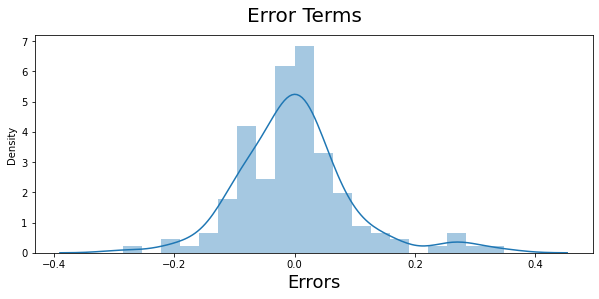

In [184]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,4))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label 
plt.show()

The residuals are following a somewhat normally distributed pattern with a mean at Zero. This seems okay

## Making Predictions using the final model

Apply scaling on `Test` Data

In [185]:
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [186]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [187]:
df_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.358620,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-2.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [188]:
y_test = df_test.pop('price')
X_test = df_test

In [195]:
# Creating X_test_m6 dataframe by taking only the variables that exist in the final train model i.e, X_train_new_6
X_test_m_final = X_test[X_train_new_6.columns]


# Adding a constant variable 
X_test_m_final = sm.add_constant(X_test_m_final)


In [196]:
# Making predictions
y_pred = lm.predict(X_test_m_final)

## Model Evaluation

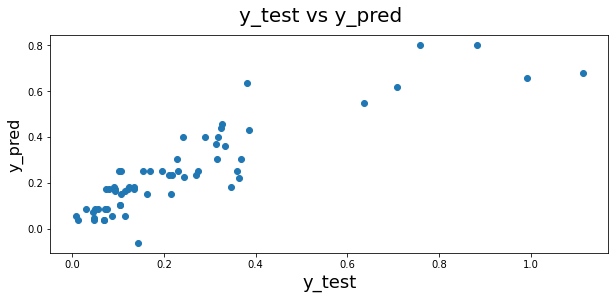

In [197]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,4))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label
plt.show()

Calculate `R Squared` on test set.

In [198]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7845903341166633

## Conclusion

1. The model for the most part is capturing the linear association well and overall looks good.<br>
2. The R square and Adjusted R square values in the above Car Price Model for trained data set are almost very close to each other i.e., 80.8 % and 80.3 % respectively. This indicates that none of the parameters in the Car Price Model are `reduntant`.<br>
3. Variance Inflation Factor of all variables is very low.<br>
4. The R-Squared Score on the test dataset is 78.45 %, which is a decent value.<br>
5. The following variables are significant for predicting the car prices in US Market :<br>
   `enginelocation_rear`, `carwidth`, `cylindernumber_three`, companyname=`BMW`.